# 1. Business Understanding
Movie, which was invented in 19th century, has become a popular entertainment of people all over the world. While movie production companies is trying to attract more people to see their movies, they also want to know what kind of movie attracts people and what they should do to make their movies more attactive, which means their movies have high scores.

Movies metadata, which is a dataset from IMDB, an online database of information related to films, television programs and video games, has 45463 obersavations and 10 attributes that are both numerical and categorical. It is good enough for lab one and can be downloaded free at kaggle.com.

Through visualizing the features, exploring the features relationships, PCA and other methods, we are able to help the movie production company know the most significant issues making their movies high scored or low scored.

From the analyzing, movie production companies will know what factors can influence the scores of their movies more efficiently. Then these companies can pay attention to these factors and make their movies more attractive or avoid making their products low scored.

==================================================================

Question of interest: Which kind of movies is easy to get a low score?

# 2.Data Understanding

## 2.1 Data Description

In [2]:
import pandas as pd
import sys
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/16703/Desktop/master_degree2/machine_learning/moviesmetadata.csv', encoding = "ISO-8859-1")


In [3]:

# only keep the revenue and budget > 0
df=df[df.revenue>0.0 ]
df=df[df.budget>0]
df=df[df.vote_count>0]

# only keep en, zh, es, fr, ru, pt, de, ja, ko, ar
language_list = ('en','zh','es','fr','ru','pt','de','ja','ko','ar')
df = df[(df.original_language == 'en') | (df.original_language == 'zh') | (df.original_language == 'es') 
                                       | (df.original_language == 'fr') | (df.original_language == 'ru') 
                                       | (df.original_language == 'pt') | (df.original_language == 'de')
                                       | (df.original_language == 'ja') | (df.original_language == 'ko')
                                       | (df.original_language == 'ar')]


# if movie with vote score larger than 6, is mean the movie "passed"
def is_pass_define(row):
    score = float(row['vote_average'])
    if score >= 6:
        result = 1;
    else:
        result = 0;
    return result


def year_gap_define(row):
    year = str(row['release_date'])
    if year != "" and '-' not in year:
        year = float(year[-4:])
        if year >= 2015:
            result = 1;
        elif year < 2015 and year >= 2010:
            result = 2;
        elif year < 2010 and year >= 2005:
            result = 3;
        elif year < 2005 and year >= 2000:
            result = 4;
        elif year < 2000 and year >= 1995:
            result = 5;
        else:
            result = 6;
        return result

# deal with the data in dictionary type
def genre_comb(row):
    s = row['genres']
    s = s.replace(' ','').replace('[','').replace(']','').replace('{','').replace('}','').replace('\'','').replace('(','').replace(')','')
    arr = s.split(',')
    comb = []
    for a in arr:
        if a.startswith('name'):
            comb.append(a.split(':')[1])
    return set(comb)

def country_comb(row):
    s = str(row['production_countries'])
    s = s.replace(' ','').replace('[','').replace(']','').replace('{','').replace('}','').replace('\'','').replace('(','').replace(')','')
    arr = s.split(',')
    comb = []
    for a in arr:
        if a.startswith('iso_3166_1'):
            comb.append(a.split(':')[1])
    return set(comb)

def company_comb(row):
    s = str(row['production_companies'])
    s = s.replace(' ','').replace('[','').replace(']','').replace('{','').replace('}','').replace('\'','').replace('(','').replace(')','')
    arr = s.split(',')
    comb = []
    for a in arr:
        if a.startswith('name'):
            comb.append(a.split(':')[1])
    return set(comb)

df['is_pass'] = df.apply (lambda row: is_pass_define(row),axis=1)
df['year'] = df.apply (lambda row: year_gap_define(row),axis=1)
df['genre_comb'] = df.apply (lambda row: genre_comb (row),axis=1)
df['country_comb'] = df.apply (lambda row: country_comb (row),axis=1)
df['company_comb'] = df.apply (lambda row: company_comb (row),axis=1)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5111 entries, 0 to 45351
Data columns (total 19 columns):
imdb_id                 5111 non-null object
title                   5111 non-null object
production_companies    5111 non-null object
budget                  5111 non-null int64
genres                  5111 non-null object
original_language       5111 non-null object
popularity              5111 non-null float64
production_countries    5111 non-null object
release_date            5111 non-null object
revenue                 5111 non-null float64
runtime                 5110 non-null float64
vote_average            5111 non-null float64
vote_count              5111 non-null float64
overview                5105 non-null object
is_pass                 5111 non-null int64
year                    5111 non-null int64
genre_comb              5111 non-null object
country_comb            5111 non-null object
company_comb            5111 non-null object
dtypes: float64(5), int64(3), objec

In [5]:
df.describe()

budget   popularity       revenue      runtime  vote_average  \
count  5.111000e+03  5111.000000  5.111000e+03  5110.000000   5111.000000   
mean   3.239414e+07    10.074306  9.404862e+07   108.719374      6.265643   
std    4.076545e+07    14.071200  1.694561e+08    20.680418      0.897734   
min    1.000000e+00     0.000001  1.000000e+00     0.000000      1.000000   
25%    6.000000e+06     5.810288  7.809262e+06    95.000000      5.700000   
50%    1.800000e+07     8.596352  3.243899e+07   105.000000      6.300000   
75%    4.000000e+07    11.884358  1.043140e+08   119.000000      6.900000   
max    3.800000e+08   547.488298  2.787965e+09   338.000000      9.000000   

        vote_count      is_pass         year  
count   5111.00000  5111.000000  5111.000000  
mean     763.33966     0.660145     3.779887  
std     1274.22183     0.473706     1.718062  
min        1.00000     0.000000     1.000000  
25%       89.00000     0.000000     2.000000  
50%      297.00000     1.000000     4.000000  
75%      848.00000     1.000000     6.000000  
max    14075.00000     1.000000     6.000000

From the dataframe information, it's easy to know that there are no missing values in each attribute(5374 rows in dataset).

However, we can use median imputation for numberical attributes and mode for the categorical features to make the dataset usable, if missing values are found.

Additionally, the values under 'budget','popularity','revenue','runtime','vote_average','vote_count' are normal, no wired values in these features. So it's believable that there are no missing values.

In [6]:
df.head()

imdb_id                 title  \
0  tt2293640               Minions   
1  tt0451279          Wonder Woman   
2  tt2771200  Beauty and the Beast   
3  tt3890160           Baby Driver   
4  tt2245084            Big Hero 6   

                                production_companies     budget  \
0  [{'name': 'Universal Pictures', 'id': 33}, {'n...   74000000   
1  [{'name': 'Dune Entertainment', 'id': 444}, {'...  149000000   
2  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  160000000   
3  [{'name': 'Big Talk Productions', 'id': 443}, ...   34000000   
4  [{'name': 'Walt Disney Pictures', 'id': 2}, {'...  165000000   

                                              genres original_language  \
0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...                en   
1  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...                en   
2  [{'id': 10751, 'name': 'Family'}, {'id': 14, '...                en   
3  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...                en   
4  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...                en   

   popularity                               production_countries release_date  \
0  547.488298  [{'iso_3166_1': 'US', 'name': 'United States o...    6/17/2015   
1  294.337037  [{'iso_3166_1': 'US', 'name': 'United States o...    5/30/2017   
2  287.253654  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...    3/16/2017   
3  228.032744  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...    6/28/2017   
4  213.849907  [{'iso_3166_1': 'US', 'name': 'United States o...   10/24/2014   

        revenue  runtime  vote_average  vote_count  \
0  1.156731e+09     91.0           6.4      4729.0   
1  8.205804e+08    141.0           7.2      5025.0   
2  1.262886e+09    129.0           6.8      5530.0   
3  2.245113e+08    113.0           7.2      2083.0   
4  6.521054e+08    102.0           7.8      6289.0   

                                            overview  is_pass  year  \
0  Minions Stuart, Kevin and Bob are recruited by...        1     1   
1  An Amazon princess comes to the world of Man t...        1     1   
2  A live-action adaptation of Disney's version o...        1     1   
3  After being coerced into working for a crime b...        1     1   
4  The special bond that develops between plus-si...        1     2   

                                       genre_comb country_comb  \
0          {Adventure, Animation, Comedy, Family}         {US}   
1                    {Fantasy, Adventure, Action}         {US}   
2                      {Romance, Family, Fantasy}     {US, GB}   
3                                 {Crime, Action}     {US, GB}   
4  {Animation, Adventure, Comedy, Family, Action}         {US}   

                                        company_comb  
0     {IlluminationEntertainment, UniversalPictures}  
1  {AtlasEntertainment, DCEntertainment, WarnerBr...  
2              {MandevilleFilms, WaltDisneyPictures}  
3  {WorkingTitleFilms, BigTalkProductions, MediaR...  
4   {WaltDisneyPictures, WaltDisneyAnimationStudios}

In [7]:
li = df['genre_comb'].tolist()
le = df['country_comb'].tolist()
lea = df['company_comb'].tolist()
odd = []
odd1 = []
odd2 = []

for l in li:
    for g in l:
        if g not in odd:
            odd.append(g)
            
for l in le:
    for g in l:
        if g not in odd1:
            odd1.append(g)
            
for l in lea:
    for g in l:
        if g not in odd2:
            odd2.append(g)
            
data_des = pd.DataFrame()
data_des['Features'] = ['genres','country','company','original_language',
                        'release_date','budget','popularity','revenue',
                        'runtime','vote_average','vote_count']
data_des['description'] = ['genre of the movie','country of movie','company of movie',
                          'original language of movie','when the movie is released',
                           'budget of movies','popularity of movie',
                          'revenue of movie','how many times the movie is seen','the score of the movie',
                          'how many times the movie is scored']
data_des['Scales'] = ['norminal'] * 5 + ['ratio'] * 6
data_des['Discrete\Continuous'] = ['discrete'] * 5 + ['continuous'] * 6
data_des['range'] = [repr(set(odd)),repr(set(odd1)),repr(set(odd2)),
                     repr(set(df.original_language)),repr(set(df.release_date)),'1.000000e+00 - 3.800000e+08',
                     '0.000001 - 547.488298','1.000000e+00 - 2.787965e+09','0 - 1256','1 - 10','1 - 14075']
data_des


Features                         description    Scales  \
0              genres                  genre of the movie  norminal   
1             country                    country of movie  norminal   
2             company                    company of movie  norminal   
3   original_language          original language of movie  norminal   
4        release_date          when the movie is released  norminal   
5              budget                    budget of movies     ratio   
6          popularity                 popularity of movie     ratio   
7             revenue                    revenue of movie     ratio   
8             runtime    how many times the movie is seen     ratio   
9        vote_average              the score of the movie     ratio   
10         vote_count  how many times the movie is scored     ratio   

   Discrete\Continuous                                              range  
0             discrete  {'Horror', 'Foreign', 'Animation', 'Fantasy', ...  
1             discrete  {'AO', 'VE', 'MX', 'CH', 'SE', 'QA', 'MC', 'LU...  
2             discrete  {'InkjetProductions', 'VideoFilmes', 'Threshol...  
3             discrete  {'fr', 'ko', 'pt', 'es', 'ja', 'de', 'ru', 'zh...  
4             discrete  {'9/25/2014', '2/4/1998', '9/29/2006', '3/12/1...  
5           continuous                        1.000000e+00 - 3.800000e+08  
6           continuous                              0.000001 - 547.488298  
7           continuous                        1.000000e+00 - 2.787965e+09  
8           continuous                                           0 - 1256  
9           continuous                                             1 - 10  
10          continuous                                          1 - 14075

The table above shows the features description, sacles, and range.

## 2.2 Data Quality

Before doing the next operation, dataset should be cleaned.

From the data analyzation in part1, all values are usable and there are no missing values.

Then, it's necessary to check if there exists duplicated values.

In [8]:
#duplicate check

Through the duplicated values checking, there are no duplicated values in this dataset because the result is 0. And the result of df[idx] also shows that no duplicated values existing. Thus, there are mo duplicated values.

# 3.Data Visualization

## 3.1 Data Exploration

In [9]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

### 3.1.1 Movie Rating by Genre

In [10]:
# genre is a greate
genres_list = odd
genres_appear = dict.fromkeys(genres_list, 0)
genres_score = dict.fromkeys(genres_list, 0)
genres_pass = dict.fromkeys(genres_list, 0)
for index, row in df.iterrows():
    s = str(row['genre_comb'])
    for g in genres_list:
        if g in s:
            data = genres_appear.get(g)
            data = data + 1
            genres_appear[g] = data
            data = genres_score.get(g)
            data = data + float(row['vote_average'])
            genres_score[g] = data
            if(float(row['is_pass']) == 1):
                data = genres_pass.get(g)
                data = data + 1
                genres_pass[g] = data
                
for key in genres_score.keys():
    score = genres_score.get(key)
    score = score / genres_appear.get(key)
    genres_score[key] = score
    pass_rate = genres_pass.get(key)
    pass_rate = pass_rate / genres_appear.get(key)
    genres_pass[key] = pass_rate
    print("The movie type",key,"average score is",score,"and pass rate is", pass_rate)

The movie type Adventure average score is 6.244962884411452 and pass rate is 0.6383881230116649
The movie type Animation average score is 6.4732638888888845 and pass rate is 0.75
The movie type Comedy average score is 6.07734775184974 and pass rate is 0.5833807626636311
The movie type Family average score is 6.178352490421463 and pass rate is 0.6187739463601533
The movie type Fantasy average score is 6.167326732673276 and pass rate is 0.6
The movie type Action average score is 6.094302848575722 and pass rate is 0.5907046476761619
The movie type Romance average score is 6.293776824034341 and pass rate is 0.674892703862661
The movie type Crime average score is 6.3753056234718795 and pass rate is 0.7224938875305623
The movie type ScienceFiction average score is 6.095047923322683 and pass rate is 0.5814696485623003
The movie type Thriller average score is 6.1637180373186 and pass rate is 0.6219765031098825
The movie type Mystery average score is 6.338709677419351 and pass rate is 0.7004608

Text(0.5,1,'Average Pass Rate by Genre')

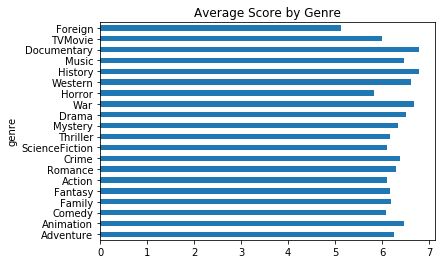

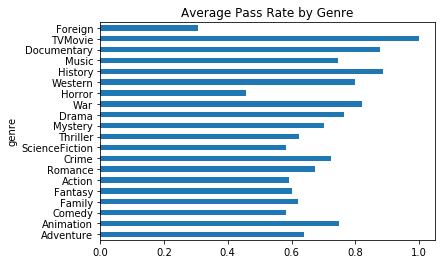

In [11]:
genres_score_table = pd.DataFrame()
genres_score_table['genre'] = genres_score.keys()
genres_score_table['score'] = genres_score.values()
genres_score_table['pass'] = genres_pass.values()
genres_score_table.plot.barh('genre','score',legend=False)
plt.title('Average Score by Genre')
genres_score_table.plot.barh('genre','pass',legend=False)
plt.title('Average Pass Rate by Genre')

The "Average Score by Genre" and "Average Pass Rate by Genre" shows the movie belong to Foreign and Horror has the worst average score, and the pass rate are lower than 50% as well. And the movie genre with Documentary, History and War have better average score and high pass rate.

As we know, the good movie is coming with good and meaningful story. Audience could learn something after the movie finish and light on. Thus, the movie with Documentary, History and War genre are normally make by large production company even with government support. The story is real and very instructive. However, in another hand, horror movie’s job is not really let audience learn something. It just brings a special feeling or create special environment for audience. Thus, the story is not really matter. In addition, the audience group is limited, some audience doesn’t like honor movie at first place.

And the Foreign with low score probably cause by “recognition of cultural identity”. Human as social animal is more tend to like the culture they familiar with. 


### 3.1.2 Movie Rating by Year

In [12]:
df_grouped_year = df.groupby(by='year')
for val,grp in df_grouped_year:
    print('There were',len(grp),'movies in',val ,'.')


print('---------------------------------------')
print('The Movie Rate by Year:')
print(df_grouped_year.vote_average.sum() / df_grouped_year.vote_average.count())
    

There were 469 movies in 1 .
There were 1027 movies in 2 .
There were 962 movies in 3 .
There were 726 movies in 4 .
There were 556 movies in 5 .
There were 1371 movies in 6 .
---------------------------------------
The Movie Rate by Year:
year
1    6.315991
2    6.177118
3    6.145114
4    6.171901
5    6.220144
6    6.467396
Name: vote_average, dtype: float64


Text(0.5,1,'Average Rate by Year ')

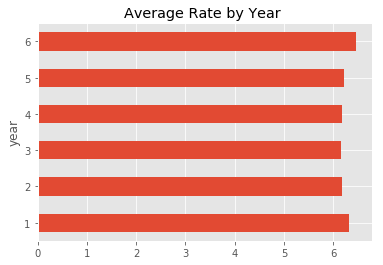

In [13]:
# Start by just plotting what we previsously grouped!
plt.style.use('ggplot')

average_score_by_language = df_grouped_year.vote_average.sum() / df_grouped_year.vote_average.count()
ax = average_score_by_language.plot(kind='barh')
plt.title('Average Rate by Year ')

The “Average Rate by Year” shows the average rate score is all nearly 6. The top two vote rate are from old movie and new movie. As before, we always hear some words like people more enjoy old movie. But according the data, the truth is audience pay more attention on story itself, not the “sense of the age” of movie.

### 3.1.3 Movie Rating by Language

In [14]:
# lets aggregate by language and count the movie rate
df_grouped_ori_language = df.groupby(by='original_language')
for val,grp in df_grouped_ori_language :
    print('There were', len(grp), 'movies use', val,'as original language')
print('---------------------------------------')
print('The Movie Rate by Language:')
print(df_grouped_ori_language.vote_average.sum() / df_grouped_ori_language.vote_average.count())

There were 22 movies use de as original language
There were 4792 movies use en as original language
There were 38 movies use es as original language
There were 89 movies use fr as original language
There were 39 movies use ja as original language
There were 25 movies use ko as original language
There were 7 movies use pt as original language
There were 70 movies use ru as original language
There were 29 movies use zh as original language
---------------------------------------
The Movie Rate by Language:
original_language
de    6.781818
en    6.253214
es    6.713158
fr    6.610112
ja    7.028205
ko    6.956000
pt    7.428571
ru    5.384286
zh    6.510345
Name: vote_average, dtype: float64


Text(0.5,1,'Average Rate by Language')

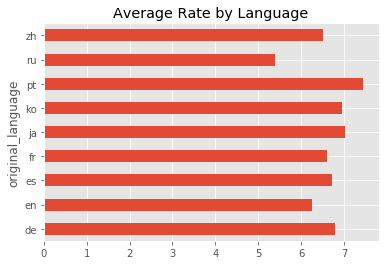

In [15]:
plt.style.use('ggplot')

average_score_by_language = df_grouped_ori_language.vote_average.sum() / df_grouped_ori_language.vote_average.count()
ax = average_score_by_language.plot(kind='barh')
plt.title('Average Rate by Language')

### 3.1.4 Feature Discretization

is_pass                         False  True 
popularity_level revenue_level              
popularity_low   revenue_low      448    640
                 revenue_media    660   1002
                 revenue_high     143    235
popularity_media revenue_low       49    138
                 revenue_media    245    610
                 revenue_high     159    556
popularity_high  revenue_low        1      2
                 revenue_media     11     27
                 revenue_high      21    162


Text(0.5,1,'pass Percentages by popularity Level and revenue Range')

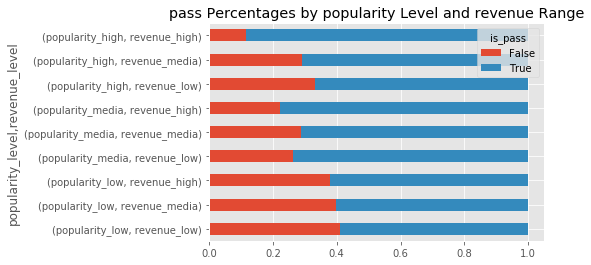

In [16]:
df['popularity_level'] = pd.cut(df.popularity,[0,10,20,300],2, labels=['popularity_low','popularity_media','popularity_high'])
df['revenue_level'] = pd.cut(df.revenue,[0,7.809262e+06,1.043140e+08,2.787965e+09],2, labels=['revenue_low','revenue_media','revenue_high'])
#df.hour_level.describe()

is_pass = pd.crosstab([df['popularity_level'],
                    df['revenue_level']], 
                    df.is_pass.astype(bool))
print(is_pass)

is_pass_rate = is_pass.div(is_pass.sum(1).astype(float),
                             axis=0) # normalize the value

# print survival_rate
is_pass_rate.plot(kind='barh', 
                   stacked=True)
plt.title('pass Percentages by popularity Level and revenue Range')

As we can see, high popularity and high revenue always have higher rate.And the blue part is always greater than the red part in any group. Another interesting finding from this chart is that if the movie has the low popularity,no matter how much revenue got,it always get the low pass rate.

### 3.1.5 Distributions of Continuous Features

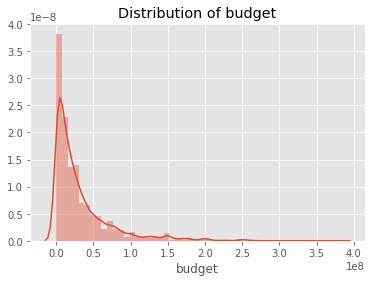

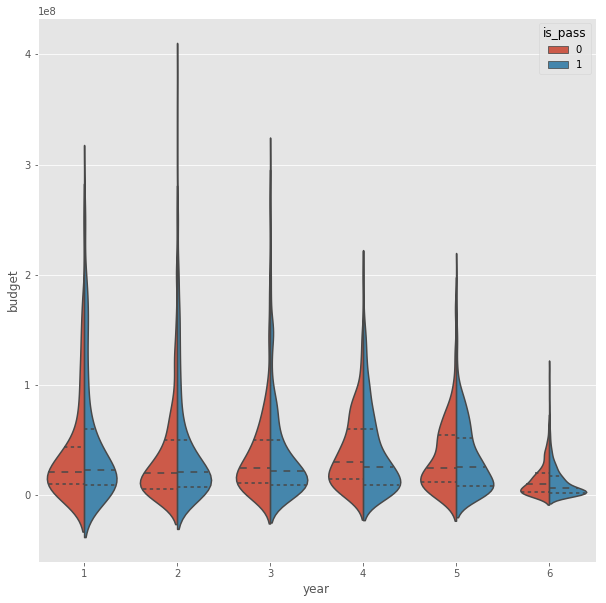

In [17]:
import seaborn as sns
#choose the color
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.budget)
plt.title('Distribution of budget')
f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="year", y="budget", hue="is_pass", data=df, 
               split=True, inner="quart")

According to the violin plot, different year range have similar spread and shape of budget level,except for year range before 1995. The reason for this is in that year range investment company .

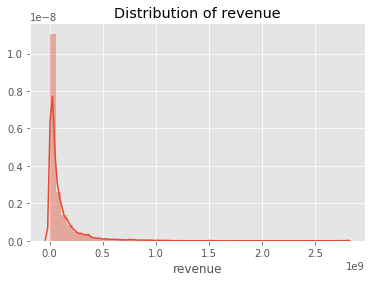

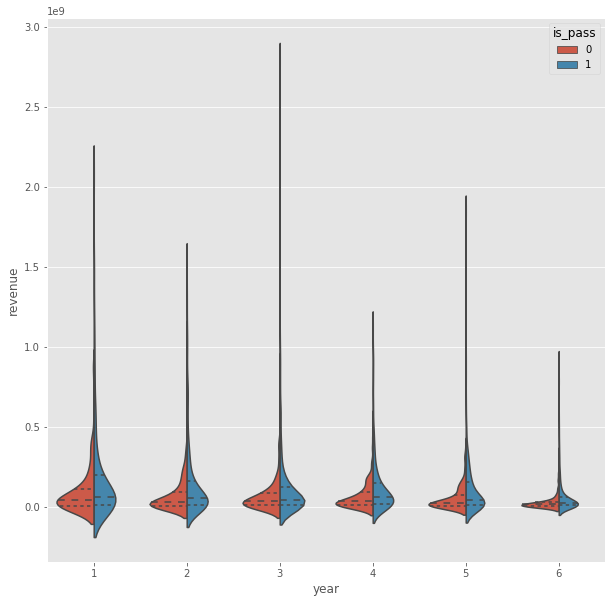

In [18]:
import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.revenue)
plt.title('Distribution of revenue')
f, ax = plt.subplots(figsize=(10, 10))

sns.violinplot(x="year", y="revenue", hue="is_pass", data=df, 
               split=True, inner="quart")

# 3.2 Data Relationship Exploration

## 3.2.1 Correaltion Matrix

Text(0.5,1,'Correlation Matrix Graph')

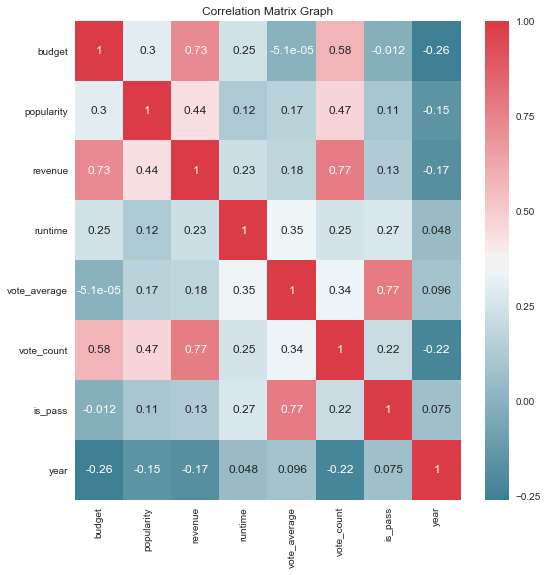

In [19]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.title('Correlation Matrix Graph')

According to the correlation table, "budget", "revenue","vote_count", and "vote_average" have positive correlation with each other. Through our table, we are focusing on is_pass(over 6 score of vote average), it shows that is_pass &runtime  and is_pass & vote_count have comparatively strong negative correlation with each other, that means the longer runtime of movies, the lower score they got. is_pass & vote_average has postive correlation with each other, that means the higher vote_average that movie got, the higher chance the movie can pass 6 score.

## 3.2.2 Scatter plots except for years

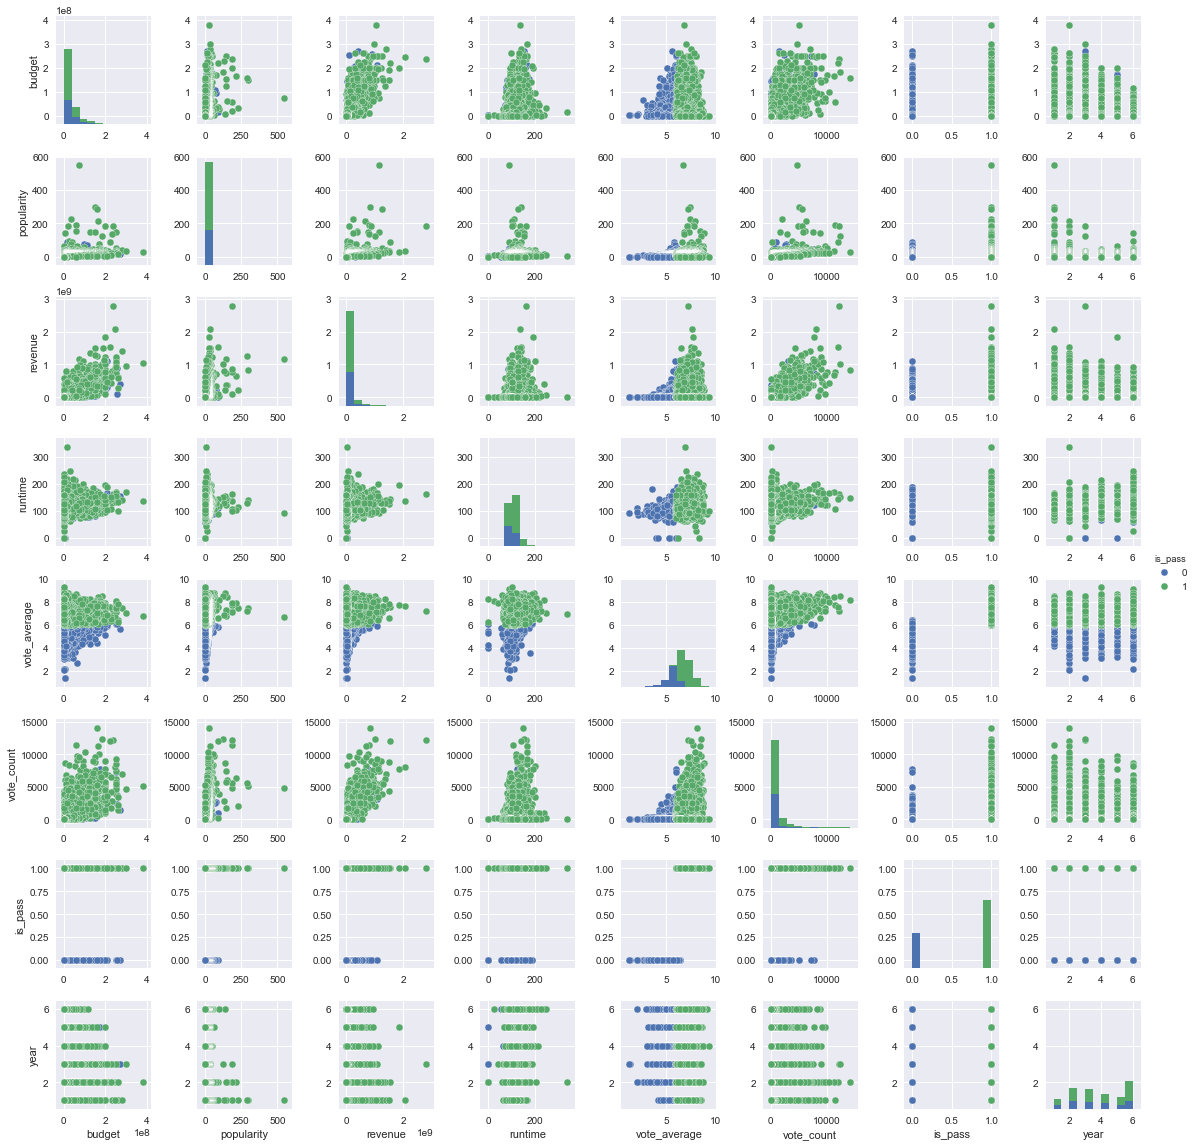

In [20]:
df_imputed_jitter = df.copy()
df_imputed_jitter[['budget','revenue','vote_average']] += np.random.rand(len(df_imputed_jitter),3)/2 
sns.pairplot(df_imputed_jitter, hue="is_pass", size=2)

From the matrix of the scatter plots, we can see that the above features are not very good classifiers for our target feature 'is_passed'. Therefore, we are to transform the features into two principle components by using PCA.

# 4. Dimensionality Reduction

In [21]:
from sklearn.decomposition.pca import PCA
from sklearn import preprocessing
df_scaled = df.copy()
df_scaled[['budget','revenue','vote_average','year','popularity','vote_count']] = preprocessing.scale(df_scaled[['budget','revenue','vote_average','year','popularity','vote_count']])
for col in ['imdb_id','title','production_companies','genres','original_language','production_countries','is_pass','release_date','overview','runtime','genre_comb','country_comb','company_comb','popularity_level','revenue_level']:
    if col in df_scaled:
        del df_scaled[col]
df_scaled=pd.DataFrame(df_scaled)
df_scaled.head()

budget  popularity   revenue  vote_average  vote_count      year
0  1.020716   38.196214  6.271748      0.149677    3.112526 -1.618195
1  2.860689   20.203717  4.287852      1.040897    3.344847 -1.618195
2  3.130552   19.700272  6.898257      0.595287    3.741206 -1.618195
3  0.039396   15.491199  0.769966      1.040897    1.035761 -1.618195
4  3.253217   14.483167  3.293545      1.709311    4.336922 -1.036087

In [23]:

from sklearn.decomposition import PCA

X = df_scaled
y = df.is_pass
target_names='is_pass'

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

# print the components

print ('pca:', pca.components_)

pca: [[ 0.47124375  0.37413693  0.53532911  0.17434563  0.52909124 -0.20258257]
 [ 0.26312178 -0.12032451  0.00742199 -0.74845123 -0.13288216 -0.58171895]]


pca: [[ 0.47124375  0.37413693  0.53532911  0.17434563  0.52909124 -0.20258257]
 [ 0.26312178 -0.12032451  0.00742199 -0.74845123 -0.13288216 -0.58171895]]


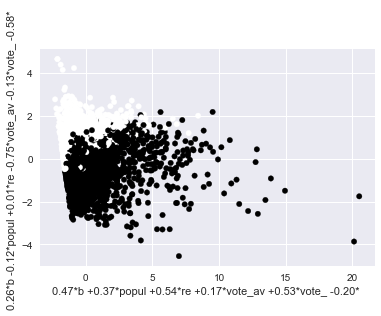

In [24]:
from sklearn.decomposition import PCA

X = df_scaled
y = df.is_pass
target_names='is_pass'
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, df_scaled.columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

import matplotlib.pyplot as plt

# scatter plot the output, with the names created from the weights
ax = df_pca.plot.scatter( pca_weight_strings[0], pca_weight_strings[1], c=y, s=30)
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

# print the components

print ('pca:', pca.components_)

After Principle Component Analysis, we reduce the data dimension from 6 to 2, visualizing the two dimension plot above, we found their are 1 clusters apearing in the graph, and it have distinguished boundary. If there were a point falling in the high-density black-point area, it's more likely to be classified as passed. But we concerned that it might be too many white points closing to the high-density black-point area. For the clear visulization, we decided to take a subset from the orignial dataset and produce another two dimentional plot.

In [25]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

pca = PCA(n_components=4)
X_pca = pca.fit(X)
plot_explained_variance(pca)

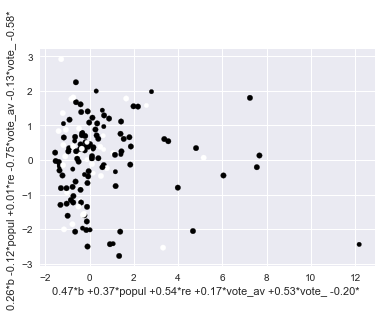

In [26]:
df_sample = df_pca.sample(frac=0.05, replace=False)
ax = df_sample.plot.scatter( pca_weight_strings[0], pca_weight_strings[1], c=y[df_sample.index.values], s=(y+2)*10)